In [7]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt

# One pattern

In [45]:
data_path='/media/maria/DATA1/Documents/old_data/natimg2800_white_M170717_MP034_2017-09-14.mat'
activity_patterns=io.loadmat(data_path)['stim'][0]['resp'][0]
act=np.pad(activity_patterns, ((0,0),(0, 10000-9479)), 'constant', constant_values=(0, 0))

In [4]:
print(activity_patterns.shape)

(4040, 9479)


In [46]:
act[act!=0]=1
act[act==0]=-1
print(act)
print(act.shape)

[[-1.  1.  1. ... -1. -1. -1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 ...
 [ 1.  1. -1. ... -1. -1. -1.]
 [ 1. -1. -1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1. -1.]]
(4040, 10000)


In [50]:
weights=np.zeros((100,100))
for j in range(0,100):
    for i in range(0,100):
        weights[j,i]=act[0,j]*act[0,i]

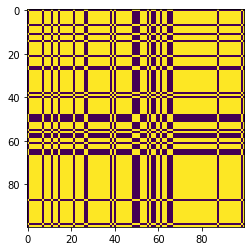

In [51]:
plt.imshow(weights)

In [66]:
new_vec=np.sign(weights@act[2,:100])
print(new_vec)

[-1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.
  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.]


In [73]:
#similarity between state and prototype
m=(1./100)*new_vec@act[4,:100]
print(m)

0.2


In [69]:
new_vec==act[0,:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Multiple Patterns

In [75]:
weights=np.zeros((100,100))
for j in range(0,100):
    for i in range(0,100):
        weights[j,i]=act[0,j]*act[0,i]
for j in range(0,100):
    for i in range(0,100):
        weights[j,i]+=act[1,j]*act[1,i]

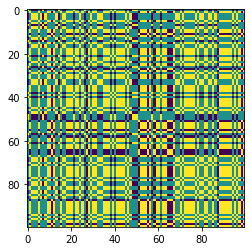

In [76]:
plt.imshow(weights)

In [82]:
new_vec=np.sign(weights@act[5,:100])

In [85]:
#similarity between state and prototype
m=(1./100)*new_vec@act[0,:100]
print(m)

1.0
